## Unsupervised vs Supervised Learning

지금까지는 대부분 supervised learning에 대해 공부하였다.

Supervised learning에서는 feature 변수 $X$들이 있고, 반응변수 $Y$가 있으며, $X$들을 이용하여 $Y$를 예측하는 것이 목표이다.

Unsupervised learning에서는 오직 feature 변수 $X$만 관찰가능하며, $Y$가 존재하지 않을 수 있기 때문에 예측에 별로 관심이 없다.

Unsupervised learning에서는 보다 효과적인 visulalization이나 subgroup에 관심이 있다.

다음의 두 방법에 대해 공부한다.

* PCA (principal component analysis) : 데이터 시각화나 superivised learning을 위한 preprocessing에서 사용

* clustering : subgroup을 밝혀내는 데에 사용

Unsupervised learning은 superivised learning 보다 주관적이며, 명확한 목표를 세우기 어렵다.

하지만 subgroup등 unsupervised learning의 테크닉들은 암진단이나 마케팅 등 다양한 분야에서 중요하게 다루어진다.

### Principal component analysis (PCA)

PCA는 차원 축소 방법 중의 하나이다.

### Dimension reduction method

Dimension reduction 방법은 기존의 $X_1, \cdots, X_p$들을 새로운 공간으로 변환하는 과정이다.

만약 $M < p$에 대해, $Z_1, \cdots, Z_M$이 $X_1, \cdots, X_p$들의 선형 조합이면, 즉,

$$ Z_m = \sum_{j=1}^p \phi_{mj} X_j $$

로 나타난다.

그러면 $X$가 아닌 $Z$를 이용하여 다른 모델링에 사용할 수 있다. 

예를 들어, 원래는 $X$들에 의한 선형회귀식을 $Z$를 이용한 회귀식으로 변경할 수 있다.

$$ y_i = \theta_0 + \sum_{m=1}^{M} \theta_m z_{im} + \epsilon_{i}.$$

만약 위 모형이 잘 설정된다면, 기존의 $X_1, \cdots, X_p$를 사용하는 것보다 더 나은 결과를 얻을 수 있다.

Dimension reduction 방법의 대표적으로 PCA (Principal component analysis) 가 있다.

### PCA


PCA는 데이터 세트의 저차원 representation을 생성한다.

* 최대 분산을 갖고 서로 상관관계가 없는 변수들의 선형 조합 시퀀스를 찾아냄.

PCA는 supervised learning을 위한 데이터를 생성하거나, 데이터 시각화를 위해 사용된다.

Feature 변수 $X_1, \cdots, X_p$가 주어졌을 때, first principal component는 다음과 같은 normalized linear combination 중에서

$$ Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + \cdots + \phi_{p1} X_p $$

가장 큰 분산을 가지는 것을 말한다. 여기서 normalized는 $\sum \phi^2_{ji} = 1$을 뜻함.

$\phi_{11}, \cdots, \phi_{p1}$을 first principal component의 loading이라고 부르고, 

$\phi_1 = (\phi_{11}, \cdots, \phi_{p1})^{\top}$를 loading vector라고 한다.

$n$개의 데이터 포인트 $x_1, x_2, \cdots, x_n$들을 loading vector를 이용하여 투영하면,

$$ z_{11} = \phi_{11} x_{11} + \phi_{21} x_{12} + \cdots + \phi_{p1} x_{1p} $$
$$ z_{21} = \phi_{11} x_{21} + \phi_{21} x_{22} + \cdots + \phi_{p1} x_{2p} $$
$$ \vdots $$
$$ z_{n1} = \phi_{11} x_{n1} + \phi_{21} x_{n2} + \cdots + \phi_{p1} x_{np} $$
이를 principal component score라고 한다.

<img src="image/PCA1.png" width="600">

위 예제에서 첫 번째 principal component는 다음으로 나타난다.

$$ Z_1 = 0.839 \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) + 0.544 \times (\mathrm{ad} - \overline{\mathrm{ad}}) $$

즉, $\phi_{11} = 0.839, \phi_{21} = 0.544$이며, 이는 $\phi_{11}^2 + \phi_{21}^2 = 1$을 만족하면서, 

$$\mathrm{Var}\left(\phi_{11} \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) + \phi_{12} \times (\mathrm{ad} - \overline{\mathrm{ad}})\right)$$

를 최대화하는 값들이다. 

물론 두 번째 principal component를 생각할 수 있다.

이는 $Z_1$과는 상관관계가 없으면서, $\mathrm{Var}\left(\phi_{12} \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) + \phi_{22} \times (\mathrm{ad} - \overline{\mathrm{ad}})\right)$를 최대화하는 coefficient들로 구성된다.

이 예제에서는 

$$ Z_2 = 0.544 \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) - 0.839 \times (\mathrm{ad} - \overline{\mathrm{ad}}) $$

이다.

비록 두 개의 principal component를 고려할수 있지만, 이 예제에서는 첫번째 component에 대부분의 정보가 포함되어 있다.

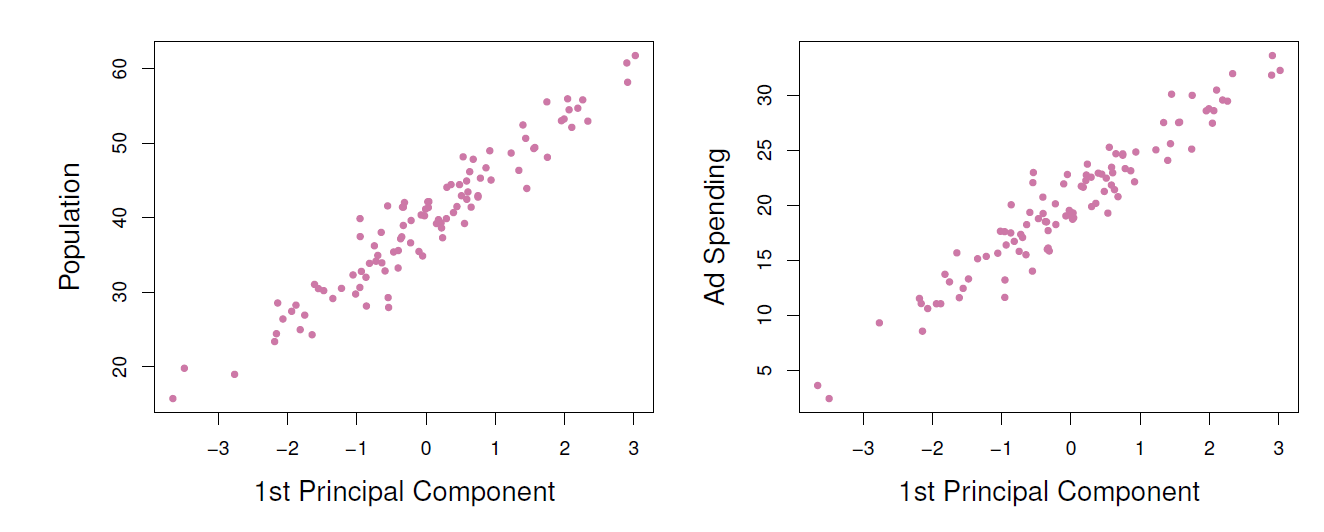

두 번째 컴포넌트에 담긴 정보는 매우 적은 것을 확인할 수 있다.

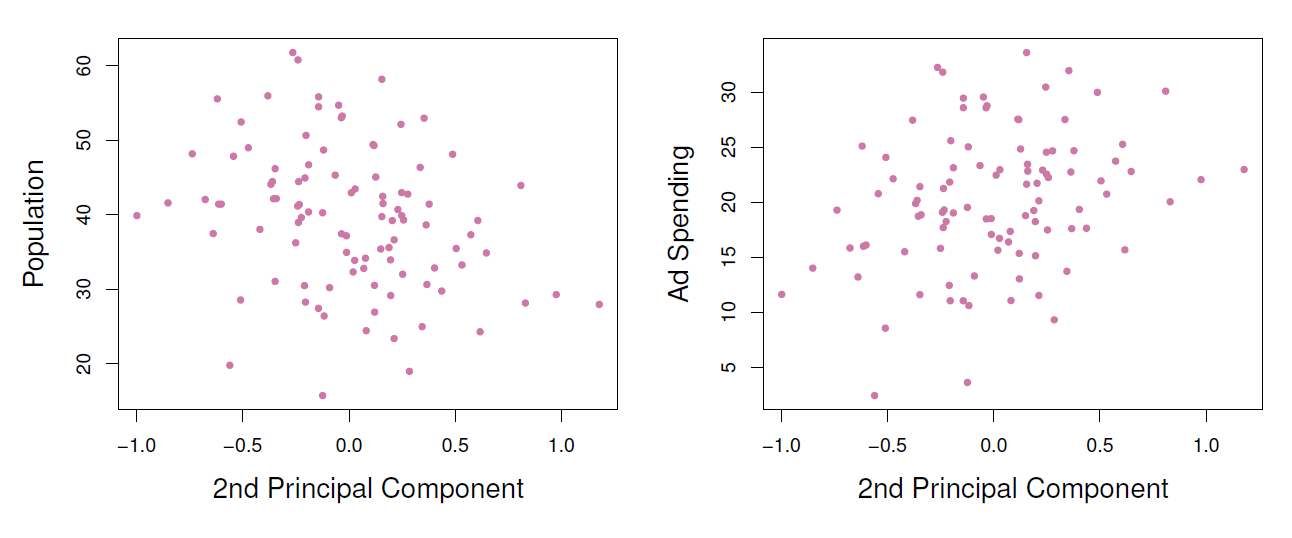

몇 개의 component를 정할지는 앞에서의 예제와 마찬가지로 테스트 에러를 추정하여 정한다.

다음은 PCA가 적용된 또다른 예제이다. 

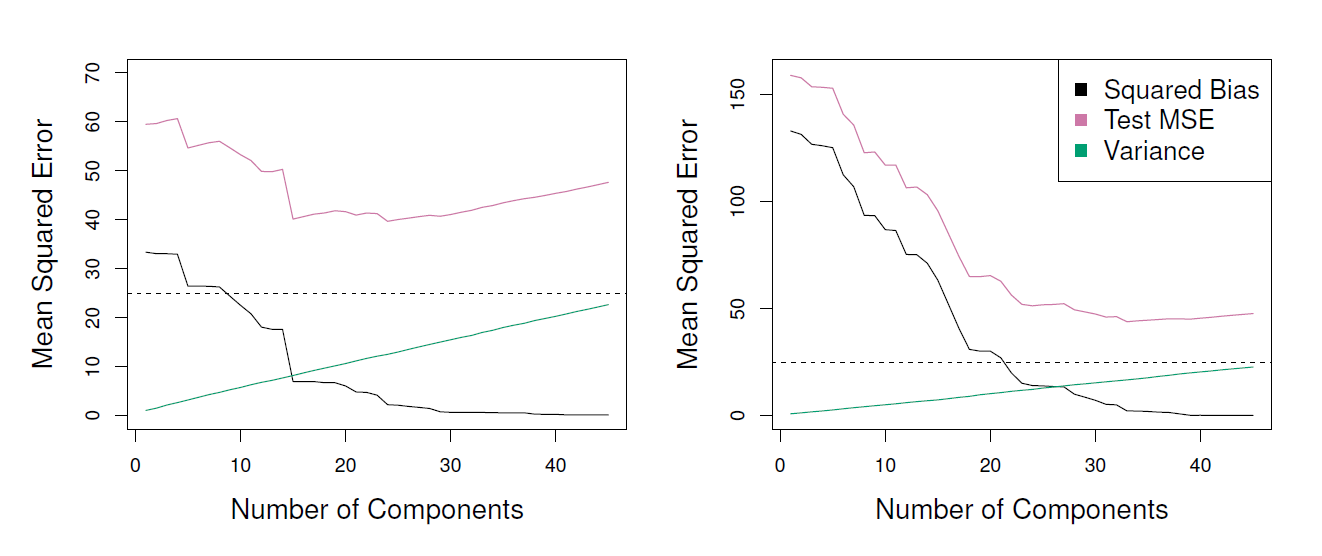

### Computation of principal component

$n \times p $ data set인 $\mathbf{X}$이 있다고 가정하자. 또한 $\mathbf{X}$의 각 변수들의 평균은 0이라고 하자.

우리는

$$ z_{i1} = \phi_{11} x_{i1} + \phi_{21} x_{i2} + \cdots + \phi_{pi} x_{ip} $$

의 형태 중 가장 표본분산이 큰 조합을 찾는 것이다. 단 제약 조건은 $\sum_{j=1}^{p} \phi^2_{j1} = 1$.

이는 다음의 최적화 문제로 귀결된다.

$$ \underset{\phi_{11}, \cdots, \phi_{p1}}{\mathrm{maximize}} ~ \frac{1}{n} \sum_{i=1}^{n} \left( \sum_{j=1}^{p} \phi_{j1}x_{ij} \right)^2 \text{ subject to } \sum_{j=1}^{p} \phi_{j1}^2 = 1$$ 

위 문제는 선형대수에서 자주 사용되는 singular-value decomposition을 통해 해결할 수 있다.

First principle component를 찾으면, 두번째 component는 $\phi_{2}$가 $\phi_{1}$에 orthogonal하다는 constraint를 추가하여 찾는다.

#### example with USArrests dataset

USArrests dataset은 미국의 50개 주에 대해 인구 100,000명 당 Assault, Murder, Rape으로 체포되는 횟수 자료이다.

추가적으로 UrbanPop이라 하여 도시에 거주하는 비율을 기록하였다.

PCA loading에 대한 결과는 다음과 같다.

 | |  PC1  | PC2 |
 |-|------|---------|
 |Murder | 0.5358995 | -0.4181809 |
 |Assault | 0.5831836 | -0.1879856 |
 |UrbanPop | 0.2781909 | 0.8728062|
 |Rape | 0.5434321 | 0.1673186 |

다음의 biplot은 시각화된 자료를 보여준다.

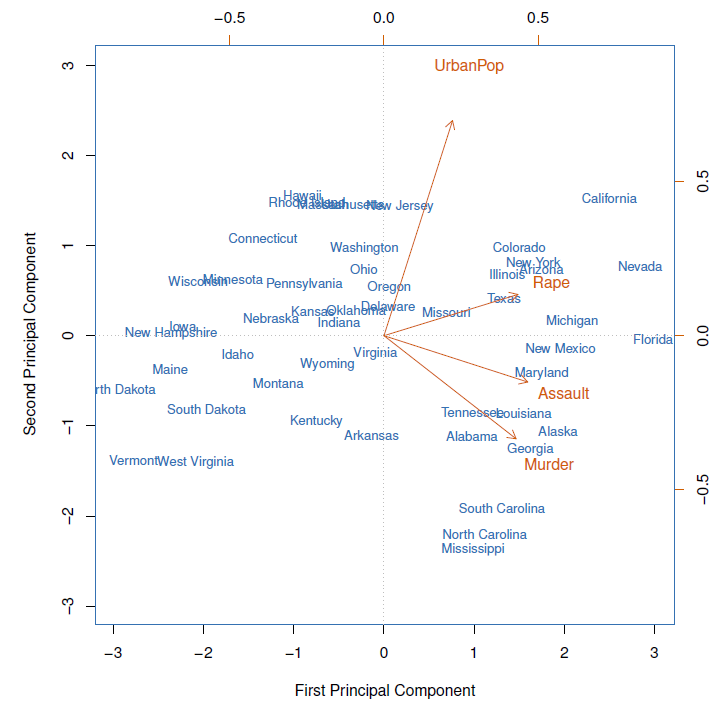


위에서 주황색 화살표들은 PCA loading 벡터들을 표현한다. 해당 축은 오른쪽과 위에 있다.

예를 들어 Rape의 first component에 대한 loading 값은 0.54, second component에 대한 loading 값은 0.17이다.

Rape과 Assault, Murder의 first component에 대한 loading 값들은 모두 비슷하다. 즉 이 세 가지 항목은 양의 상관관계를 지닌다.

반면 second loading vector의 대부분은 UrbanPop에 기인함을 볼 수 있으며, UrbanPop은 Rape, Assault, Murder 변수와는 적은 상관관계를 지닌다.

주를 나타내는 파란색 글씨들의 first component와 second component를 아래와 왼쪽 축을 기준으로 살펴볼 수 있다.

Califonia, Nevada, Floriad는 first component에 대해 높은 score를 가지고 있으며, 범죄율이 높다. 반면, North Dakoda는 낮은 범죄율을 보인다.

Califonia는 second component도 높은 score를 가지며 높은 도시화를 나타낸다. 반면 Mississipi는 도시화율이 낮다.

Indiana는 평균적인 범죄율과 도시화율을 보인다.

### Another Interpretation of Principal Components

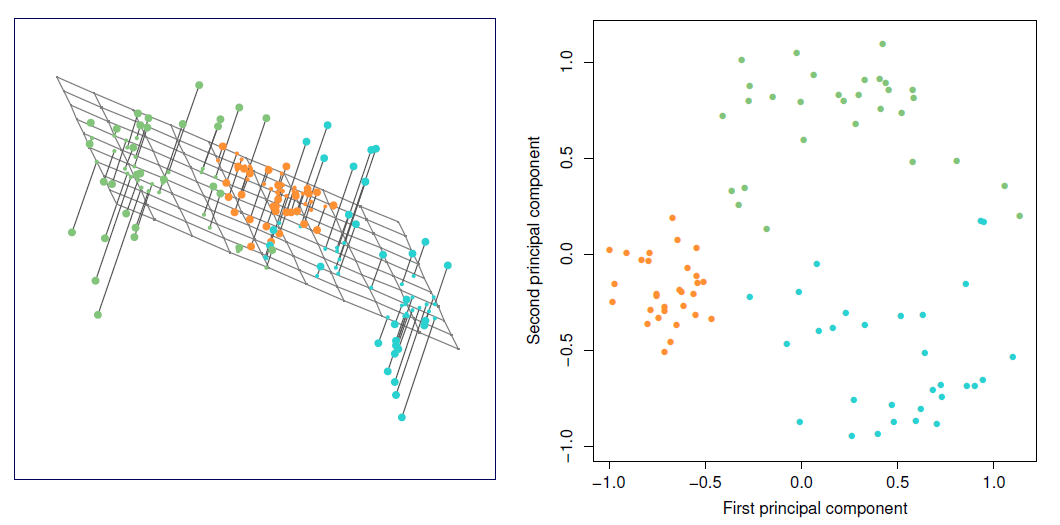

First principle component의 loading vector는 관찰값들에 대해 가장 가까운 $p$-dimensional space 상의 직선을 의미한다.

처음 두 개의 principle component의 loading vector는 관찰값들에 대해 가장 가까운 $p$-dimensional space 상의 평면을 의미한다.

처음 세 개의 principle component의 loading vector는 관찰값들에 대해 가장 가까운 $3$-dimensional hyperplane을 의미한다.

또한, 다음의 근사를 생각할 수 있다.

$$ x_{ij} \approx \sum_{m=1}^{M} z_{im} \phi_{jm} $$

### Proportion Variance Explained

각 컴포넌트의 strength를 이해하기 위해, proportion of variance explained (PVE)를 살펴볼 필요가 있다.

데이터 집합의 total variance는 

$$ \sum_{j=1}^{p} \mathrm{Var} (X_j) = \sum_{j=1}^{p} \frac{1}{n} \sum_{i=1}^{n} x_{ij}^2 $$

로 정의되며, the variance explained by the $m$th principal component는

$$ \mathrm{Var} (Z_m) = \frac{1}{n} \sum_{i=1}^{n} z_{im}^2 $$

이다.

다음이 성립한다.

$$ \sum_{j=1}^{p} \mathrm{Var} (X_j) = \sum_{m=1}^{M} \mathrm{Var} (Z_m),  \quad M = \min (n-1, p) $$

따라서 PVE는 다음으로 정의된다.

$$ \frac{\sum_{i=1}^{n} z_{im}^2}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{ij}^2} $$

PCA는 cross-validation이 불가능하기 때문에, PVE 그림을 통해 적절한 component의 수를 찾는다.

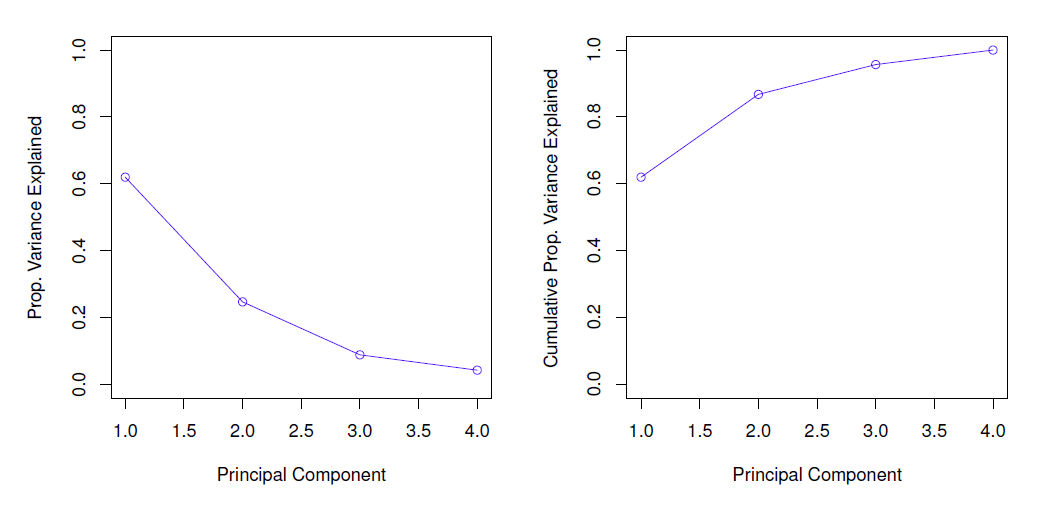

### sklearn에서의 PCA

[```sklearn.decomposition.PCA```](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
breast = load_breast_cancer()

In [2]:
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

In [3]:
breast_dataset= pd.DataFrame(np.concatenate([breast_data,labels],axis=1))

In [4]:
features = breast.feature_names

In [5]:
features_labels = np.append(features,'label')

In [6]:
breast_dataset.columns = features_labels

In [7]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
std_sclaer = StandardScaler()
x = std_sclaer.fit_transform(x) # normalizing the features

In [10]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [11]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])

In [12]:
df = pd.concat([principal_breast_Df, breast_dataset['label']], axis = 1)
df

,principal component 1,principal component 2,label
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign
...,...,...,...
564,6.439315,-3.576817,Benign
565,3.793382,-3.584048,Benign
566,1.256179,-1.902297,Benign
567,10.374794,1.672010,Benign


In [13]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [14]:
# loading vectors
pca_breast.components_ 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [15]:
pca_breast.components_[0].T @ x[0,:], pca_breast.components_[1].T @ x[0,:]

(9.192836826213245, 1.9485830707794767)

<Figure size 432x288 with 0 Axes>

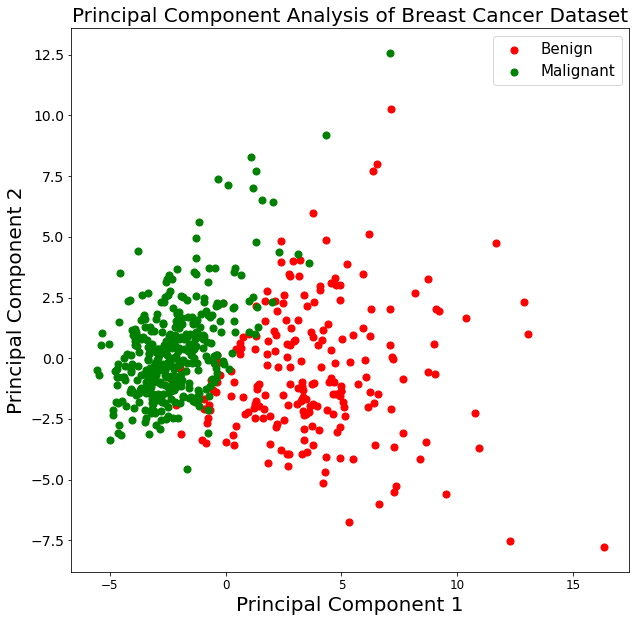

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### LDA에 적용

In [17]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(principal_breast_Df, breast_dataset['label'])

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [19]:
lda.fit(X_tn, y_tn)

LinearDiscriminantAnalysis()

In [20]:
import numpy as np
xx1, xx2 = np.meshgrid(np.linspace(-6, 17, 1000),
                         np.linspace(-8, 13, 1000))

np.c_[xx1.ravel(), xx2.ravel()]
clss = lda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

In [21]:
clss[clss=="Malignant"] = 1
clss[clss=="Benign"] = 0
clss = clss.astype(np.int64)

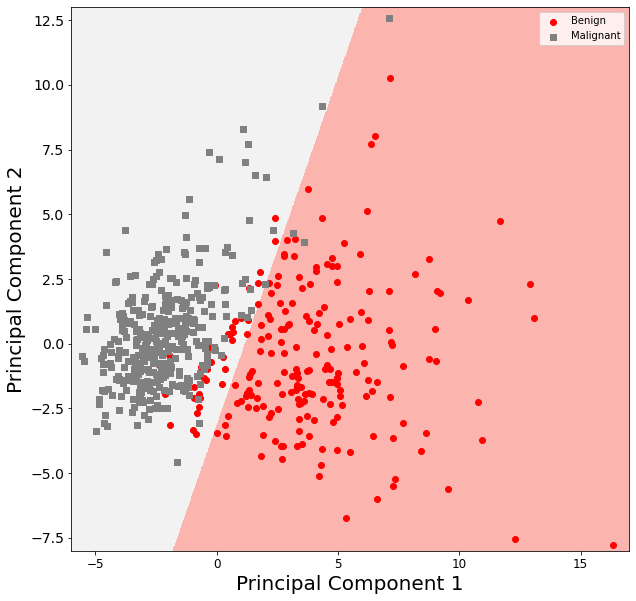

In [22]:
import matplotlib.pyplot as plt
#from matplotlib import colors

plt.figure(figsize=(10, 10))
plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

status = ['Benign', 'Malignant']
markers = ['o', 's']
colors = ["red", "grey"]



for st, mark, color in zip(status, markers, colors):
    X_i = df[df['label'] == st]
    plt.scatter(X_i[["principal component 1"]], X_i[["principal component 2"]], marker = mark, label = st, color = color)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
    
plt.legend()    
plt.show()

In [23]:
## example new data

x_new = [18.81, 18.15, 110.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498,
       0.1582, 0.05395, 0.7282, 1.317, 5.865, 112.4, 0.006494, 0.01893,
       0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2128.0,
       0.0152, 0.315, 0.5972, 0.2388, 0.2768, 0.07615]
x_new = np.array(x_new).reshape(1, -1)

In [24]:
x_new_std = std_sclaer.transform(x_new)

In [25]:
x_new_std

array([[ 1.32995562, -0.26520386,  0.74269913,  1.72099748,  0.1387526 ,
        -0.03109908,  0.74200738,  1.18809286, -0.83832462, -1.25424076,
         1.16587569,  0.18170032,  1.48456748,  1.58550746, -0.1823337 ,
        -0.36597246,  0.06685396,  0.55376156, -0.84540629, -0.68005955,
         2.28842973,  0.8472399 ,  2.36912947,  2.19284997, -5.13618976,
         0.38635918,  1.5592504 ,  1.89104864, -0.21476962, -0.43201158]])

In [26]:
x_new_pca = pca_breast.transform(x_new_std)
x_new_pca

array([[ 3.78602683, -4.64957859]])

In [27]:
print(lda.predict(x_new_pca))

['Benign']


## Clustering

Clustering은 데이터 셋으로부터 비슷한 성질을 가지는 subgroup 혹은 cluster를 형성하는 테크닉이다.

PCA는 관찰값들의 분산을 설명할 수 있는 저차원 표현법을 찾는 과정이라면

Clustering은 성질이 비슷한 subgroup을 찾아가는 과정이다.

* K-means clustering : 관찰값들을 미리 지정한 숫자의 cluster로 분할하는 방법

* hierarchical clustering : cluster의 개수가 얼마가 될지 미리 알지 못하는 상태에서 dendrogram이라 불리우는 tree 형태의 시각화 결과를 얻게 된다. 

### K-mean clustering

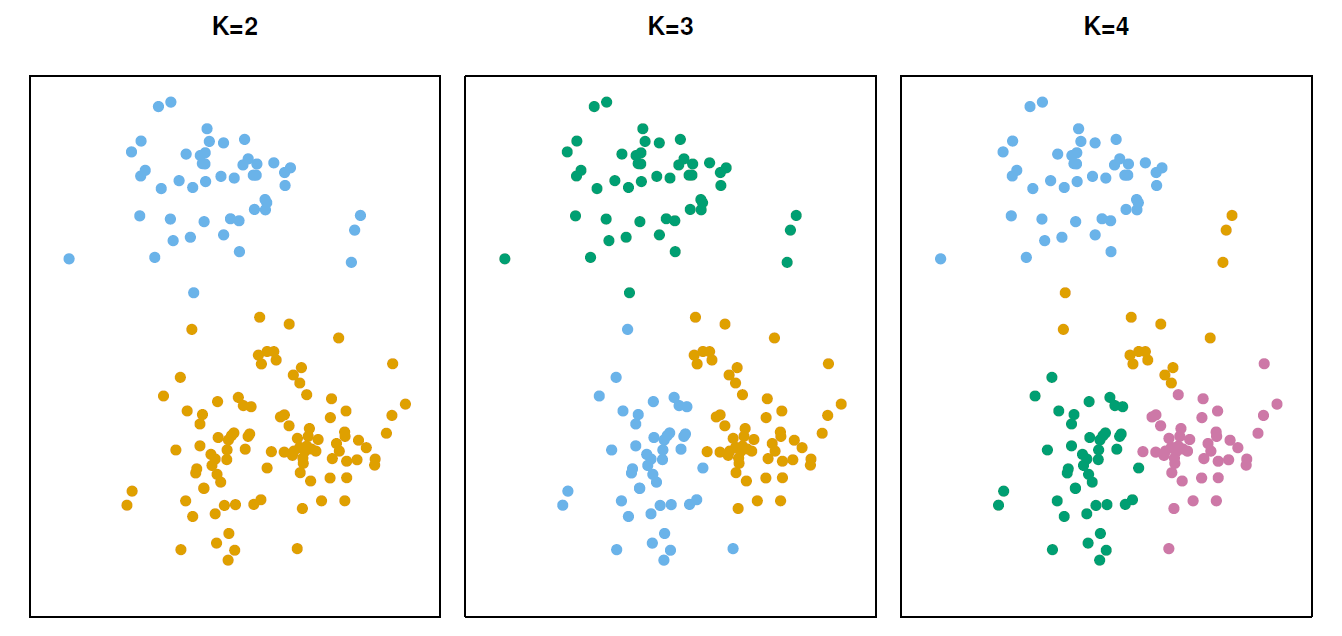


서로 다른 K 값에 대해 clustering의 결과를 보여준다.

Cluster에는 순서가 없으며 색은 임의로 배정되었다.

Cluster label은 clustering에 이용된 것이 아니라 clustering의 결과임을 주지하라.

$C_1, \cdots, C_K$를 각 클러스터 별 데이터 인덱스로 이루어진 집합이라고 하자. 그러면 이들은 다음을 만족한다.

* $C_1 \cup \cdots \cup C_K = \{1, \cdots, n \}$  
* $C_k \cap C_{k'} = \emptyset$ for all $k \neq k'$

좋은 clustering은 각 cluster 내에서의 변동이 될 수 있는 한 작은 clustering을 말한다.

$C_k$의 within-cluster variation을 측정하는 measure를 $\mathrm{WCV} (C_k)$라고 하자.

따라서 다음의 문제를 해결하고자 한다.

$$ \underset{C_1, \cdots, C_K}{\mathrm{minimize}} \left\{ \sum_{k=1}^{K} \mathrm{WCV} (C_k) \right\} $$

일반적으로 Euclidean distance가 WCV로 사용된다.

$$ \mathrm{WCV}(C_k) = \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i'j})^2 $$

### K-means clustering algorithm

1. 각 관찰값에 1부터 K까지 랜덤하게 숫자를 부여한다.
2. 다음 과정을 멈출 때까지 반복한다.
   1. 각 K cluster에서 cluster별 centroid를 계산한다. 즉, $k$th cluster에서 feature 변수들의 평균을 계산한다.
   2. 각 observation에 가장 가까운 centroid에 해당하는 cluster 번호를 부여한다.

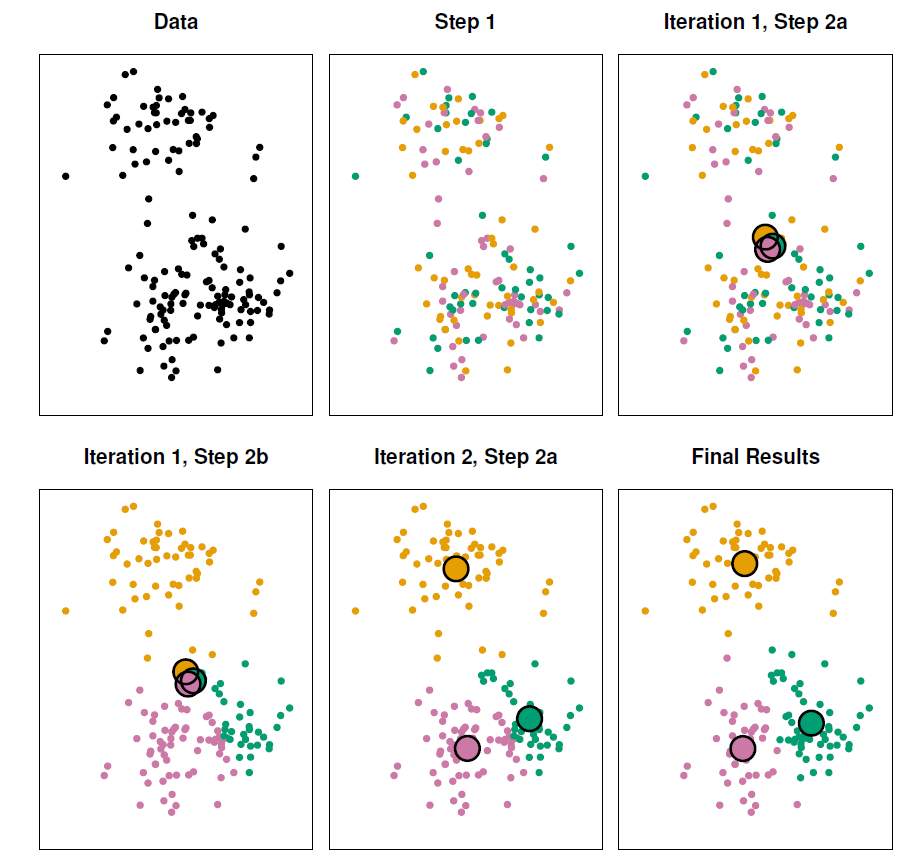

In [28]:
from sklearn.cluster import KMeans
import numpy as np


In [29]:
# 가상의 데이터
n = 200
mvec = np.random.choice([0, 0, 0.8], n, replace=True)
X1 = np.random.normal(mvec, 0.3, n)
mask = mvec == 0.8
X2 = np.random.normal(np.random.choice([-0.8, 0.8], n, replace = True), 0.3, n)
temp = np.random.normal(0, 0.3, n)
X2[mask] = temp[mask]

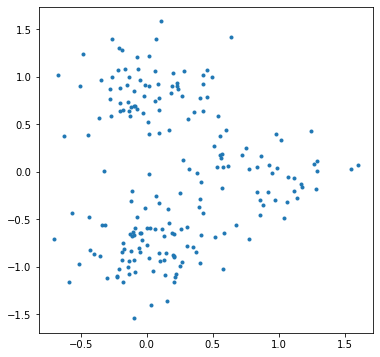

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(X1, X2, '.')
plt.show()

In [31]:
X = np.c_[X1, X2]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [32]:
kmeans.labels_

array([2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0,
       1, 0])

In [33]:
kmeans.predict([[-1, -1], [1, 1]])

array([0, 1])

In [34]:
kmeans.cluster_centers_

array([[ 0.00504907, -0.76695678],
       [-0.00131972,  0.8603201 ],
       [ 0.86358982, -0.02850761]])

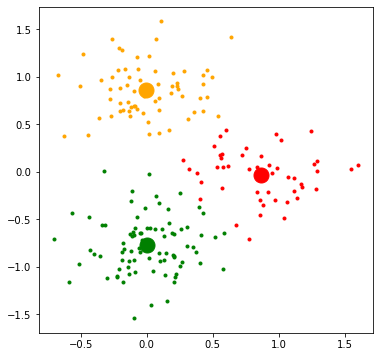

In [35]:
plt.figure(1, figsize=(6, 6))


plt.scatter(X[kmeans.labels_==0, 0], X[kmeans.labels_==0, 1], marker=".", color="green")
plt.scatter(X[kmeans.labels_==1, 0], X[kmeans.labels_==1, 1], marker=".", color="orange")
plt.scatter(X[kmeans.labels_==2, 0], X[kmeans.labels_==2, 1], marker=".", color="red")

plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], marker='o', color = "green", markersize=15)
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], marker='o', color = "orange", markersize=15)
plt.plot(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], marker='o', color = "red", markersize=15)
plt.show()

#### Hierarchical Clustering

Hierachical clustering은 bottom-up 방식으로 K-clustering과 달리 미리 정한 숫자 $K$가 필요하지 않다.

Hierarchical Clustering의 알고리즘은 다음과 같다.

1. 각 관찰값을 하나의 cluster로 본다.
2. 가장 가까운 두 cluster를 파악하고 이 둘을 합친다.
3. 반복한다.
4. 모든 포인트가 하나의 cluster로 합쳐지면 멈춘다.

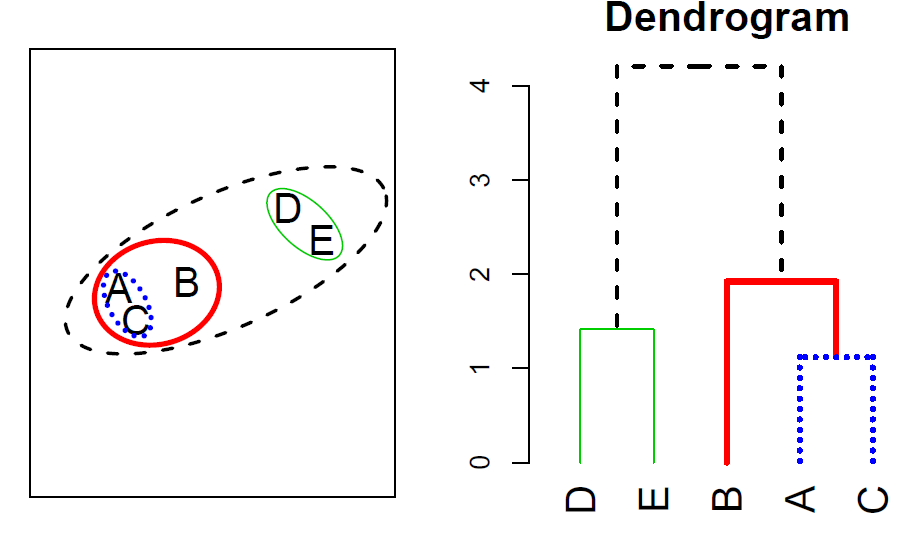

다음의 예제 그림을 보자. 비록 세 가지 색으로 구분되어 있지만 hierarchical clustering을 함에 있어 class label을 이용하지 않고 clustering을 진행한다.

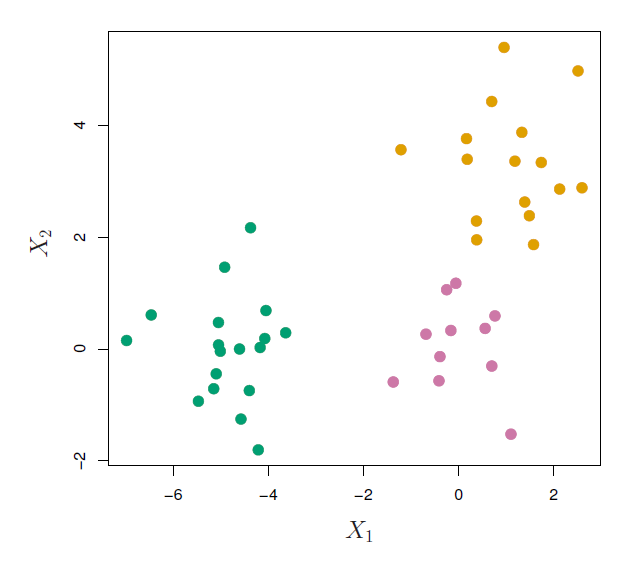

다음은 진행된 전체 clustering dendrogram을 바탕으로 1개, 2개, 3개의 클러스터로 구분할 수 있음을 보인다.

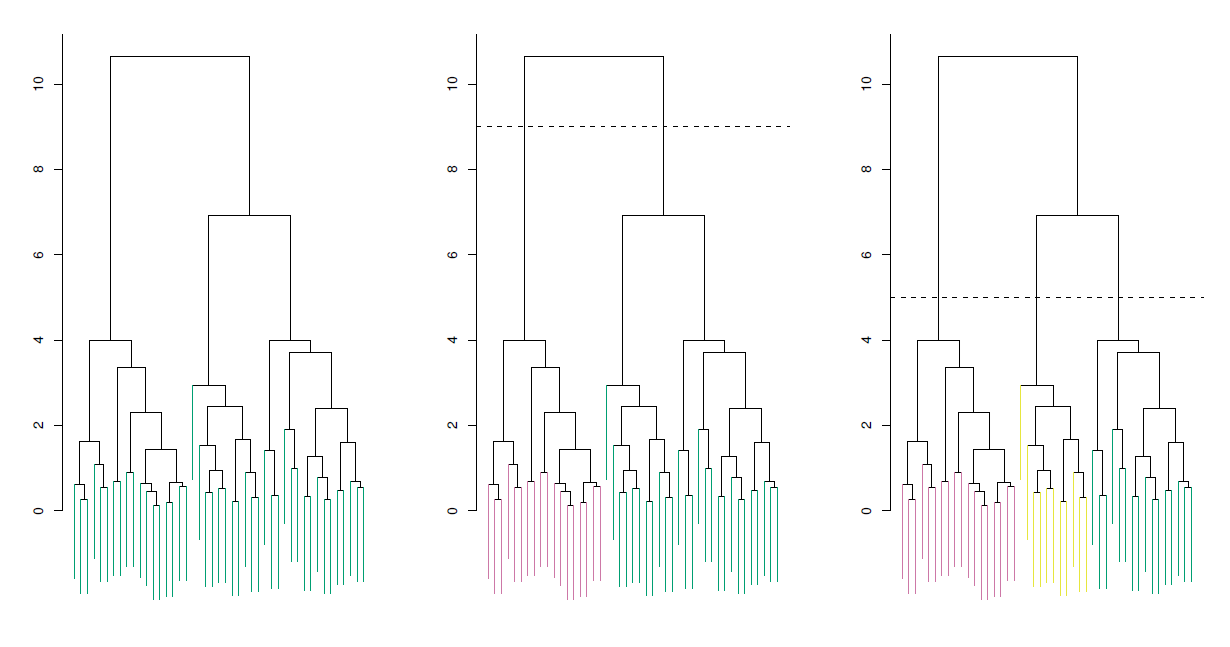

In [36]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering.labels_

array([2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0,
       1, 0], dtype=int64)

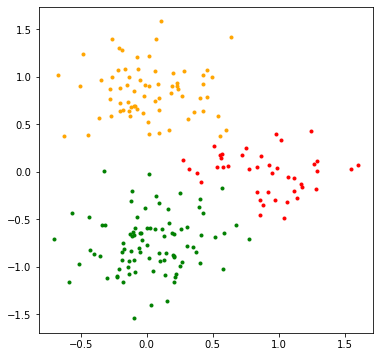

In [37]:
plt.figure(1, figsize=(6, 6))


plt.scatter(X[clustering.labels_==0, 0], X[clustering.labels_==0, 1], marker=".", color="green")
plt.scatter(X[clustering.labels_==1, 0], X[clustering.labels_==1, 1], marker=".", color="orange")
plt.scatter(X[clustering.labels_==2, 0], X[clustering.labels_==2, 1], marker=".", color="red")

plt.show()